# Pymaceuticals Inc.
---

### Analysis

The purpose of this study was to determine Capomulin's effectiveness in treating tumors in mice. The results show that Capumulin was effective. The tumors decreased in size for mice treated with Capumulin. 

Ramicane was also an effective medicine. Infubinol and Certamin were not. Tumors remained the same size if not larger for mice being treated with Infubinol or Certamin.

Other points of note:
The more a mouse weighed, the larger their tumor was. Smaller mice had smaller tumors. 
The gender of the nice did not impact the size of their tumors or the effectiveness of their treatment. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_study_merge.count()['Mouse ID']

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dupes = mouse_study_merge[mouse_study_merge.duplicated(subset=['Mouse ID', 'Timepoint'])]
mouse_dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_merge = mouse_study_merge.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_study_merge.count()['Mouse ID']

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mouse_study_mean = mouse_study_merge.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
mouse_study_median = mouse_study_merge.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
mouse_study_var = mouse_study_merge.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
mouse_study_std = mouse_study_merge.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
mouse_study_sem = mouse_study_merge.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

mouse_study_sum_stats = pd.DataFrame(columns = ['Tumor Volume Mean', 'Tumor Volume Median', 'Tumor Volume Variance',
                                     'Tumor Volume Standard Dev', 'Tumor Volume SEM'])

mouse_study_sum_stats['Tumor Volume Mean'] = mouse_study_mean
mouse_study_sum_stats['Tumor Volume Median'] = mouse_study_median
mouse_study_sum_stats['Tumor Volume Variance'] = mouse_study_var
mouse_study_sum_stats['Tumor Volume Standard Dev'] = mouse_study_std
mouse_study_sum_stats['Tumor Volume SEM'] = mouse_study_sem

mouse_study_sum_stats



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

mouse_study_agg = mouse_study_merge.groupby(['Drug Regimen']).aggregate({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
mouse_study_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mouse_study_grouped = mouse_study_merge.groupby(['Drug Regimen'])
mouse_study_new = mouse_study_grouped['Drug Regimen'].count()

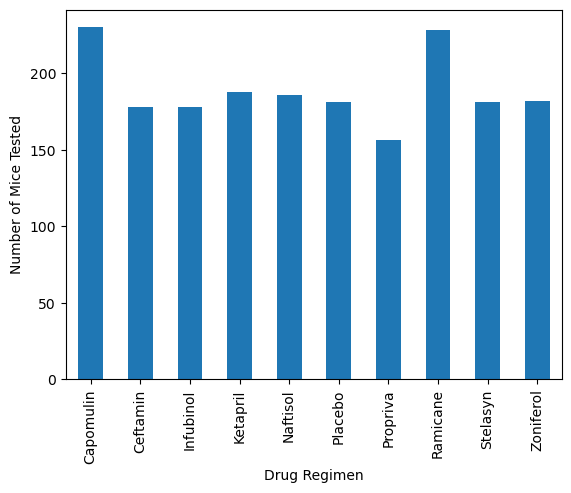

In [10]:
mouse_study_new.plot(kind = 'bar', y='Mouse ID', x='Drug Regimen', ylabel = 'Number of Mice Tested', xlabel = 'Drug Regimen');

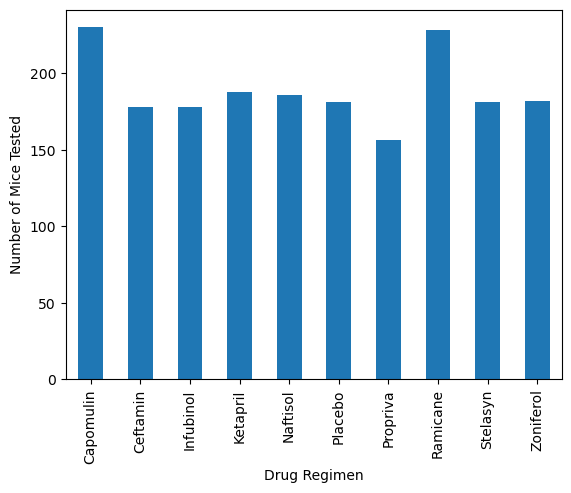

<Figure size 640x480 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mouse_study_bar = mouse_study_new.plot.bar()

mouse_study_bar.set_xlabel("Drug Regimen")
mouse_study_bar.set_ylabel("Number of Mice Tested")

plt.show()
plt.tight_layout()

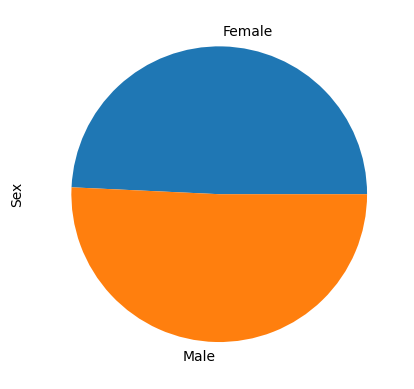

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_study_sex = mouse_study_merge.groupby(['Sex'])
mouse_study_sexes = mouse_study_sex['Sex'].count()

mouse_study_sexes.plot(kind = 'pie');

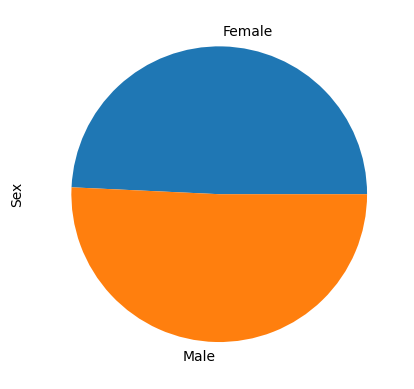

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_study_pie = mouse_study_sexes.plot.pie()

In [14]:
mouse_study_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# mouse_study_capo = mouse_study_merge.loc[mouse_study_merge['Drug Regimen'] == "Capomulin"]
# mouse_study_rami = mouse_study_merge.loc[mouse_study_merge['Drug Regimen'] == "Ramicane"]
# mouse_study_infu = mouse_study_merge.loc[mouse_study_merge['Drug Regimen'] == "Infubinol"]
# mouse_study_ceft = mouse_study_merge.loc[mouse_study_merge['Drug Regimen'] == "Ceftamin"]
                                        
# Start by getting the last (greatest) timepoint for each mouse
mouse_study_mice = mouse_study_merge.groupby(['Mouse ID'])

mouse_top_timepoint = mouse_study_mice.max(['Timepoint'])[['Timepoint']]

mouse_top_timepoint.head()


,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30


In [16]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_study_merged = pd.merge(mouse_top_timepoint, mouse_study_merge, on=["Mouse ID", "Timepoint"], how="inner")
mouse_study_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments:
    treatment_df = mouse_study_merge.loc[mouse_study_merge['Drug Regimen'] == treatment]
    # add subset 
    tumor_volume.append(treatment_df['Tumor Volume (mm3)'])
    quartiles = treatment_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of occupancy is: {lowerq}")
    print(f"The upper quartile of occupancy is: {upperq}")
    print(f"The interquartile range of occupancy is: {iqr}")
    print(f"The the median of occupancy is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


# Determine outliers using upper and lower bounds

    outliers = treatment_df.loc[(treatment_df['Tumor Volume (mm3)'] < lower_bound) \
                                               |(treatment_df['Tumor Volume (mm3)'] > upper_bound)]
    if outliers.shape[0]>0:
        print(treatment + " has outliers")
    else: 
        print(treatment + ' has no outliers')    
    print('---------------------------------------')
    
    

The lower quartile of occupancy is: 37.685932865
The upper quartile of occupancy is: 45.0
The interquartile range of occupancy is: 7.314067135000002
The the median of occupancy is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
Capomulin has outliers
---------------------------------------
The lower quartile of occupancy is: 36.674634585
The upper quartile of occupancy is: 45.0
The interquartile range of occupancy is: 8.325365415
The the median of occupancy is: 40.67323554 
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.
Ramicane has outliers
---------------------------------------
The lower quartile of occupancy is: 47.3123533
The upper quartile of occupancy is: 57.314443967500004
The interquartile range of occupancy is: 10.002090667500006
The the median of occupancy is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 cou

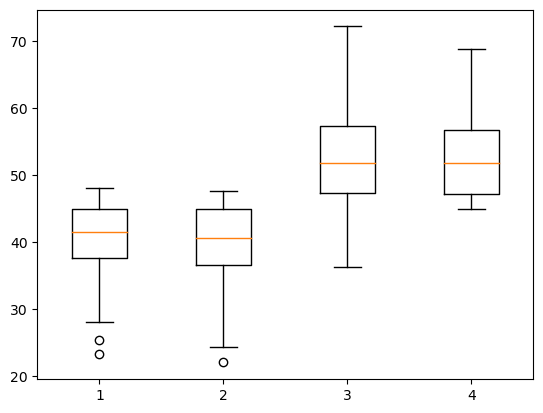

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume);


## Line and Scatter Plots

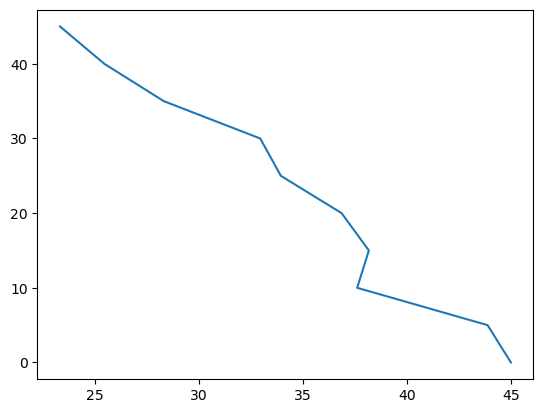

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_id = mouse_study_merge[mouse_study_merge['Drug Regimen']== 'Capomulin'].iloc[0]['Mouse ID']
df = mouse_study_merge.loc[mouse_study_merge['Mouse ID']== mouse_id]

x = df ['Tumor Volume (mm3)']
y = df ['Timepoint']

plt.plot(x,y);

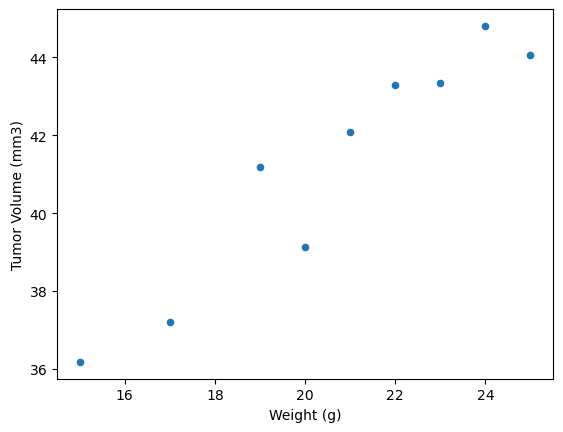

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouse_capo = mouse_study_merge[mouse_study_merge['Drug Regimen']== 'Capomulin']
mouse_weight = mouse_capo.groupby(['Weight (g)']).mean()['Tumor Volume (mm3)']
mouse_weight_d = pd.DataFrame(mouse_weight)
mouse_weight_df = mouse_weight_d.reset_index()

mouse_weight_df.plot(kind = 'scatter', x="Weight (g)", y="Tumor Volume (mm3)"); 


In [21]:
# mouse_weight_df

## Correlation and Regression

The correlation between both factors is 0.95


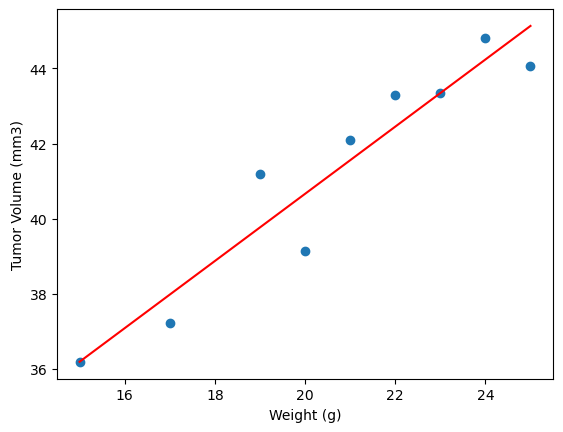

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# weight = mouse_weight_df.iloc[:,0]
# tumor_volume = mouse_weight_df.iloc[:,1]

weight = mouse_weight_df['Weight (g)']
tumor_volume = mouse_weight_df['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumor_volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(35,45),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
